<a href="https://colab.research.google.com/github/Moamen189/Decision_Tree_Regression/blob/main/Decision_Tree_RegressionII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile phone price.csv')
X = dataset['Model'].values
y = dataset['Price ($)'].values

dataset.head(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

## Training the Decision Tree Regression model on the training set

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import re

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(handle_unknown='ignore')

# Encode the categorical variables in your dataset
X_train_encoded = encoder.fit_transform(X_train.reshape(-1, 1))

# Preprocess the target variable
y_train_processed = np.array([re.sub('[^\d.]', '', price) for price in y_train]).astype(float)
y_train_encoded = y_train_processed.reshape(-1, 1)

# Create an instance of the DecisionTreeRegressor class
regressor = DecisionTreeRegressor()

# Fit the model to the encoded dataset
regressor.fit(X_train_encoded, y_train_encoded)


DecisionTreeRegressor()

## Predicting the Results

In [28]:
X_test_encoded = encoder.transform(X_test.reshape(-1, 1))
y_pred = regressor.predict(X_test_encoded)
y_pred

array([999.        , 299.        , 399.        , 299.        ,
       214.        , 299.        , 299.        , 279.        ,
       146.5       , 415.66666667, 214.        , 299.        ,
       309.        , 214.        , 214.        , 264.        ,
       199.        , 499.        , 934.        , 299.        ,
       179.        ])

## Comparing the Real Values with Predicted Values

In [29]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,1099,999.000000
1,$329,299.000000
2,399,399.000000
3,199,299.000000
4,179,214.000000
5,699,299.000000
6,$169,299.000000
7,$269,279.000000
8,$119,146.500000
9,399,415.666667


## Visualising the Decision Tree Regression Results

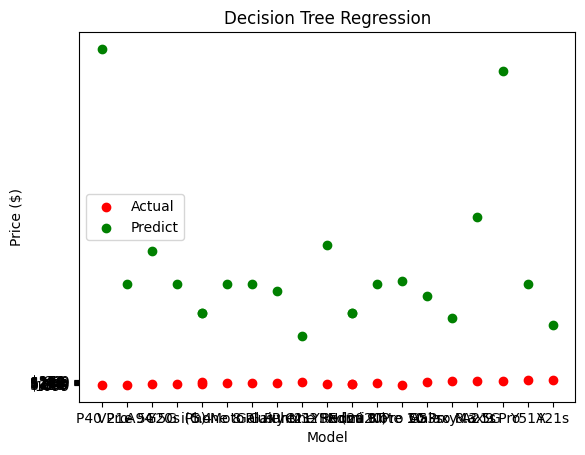

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Define X_grid
X_grid = np.arange(len(X_test)).reshape((-1, 1))

# Visualize the Decision Tree Regression Results
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color = 'green', label='Predict')
plt.title('Decision Tree Regression')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
